In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd
from matplotlib import gridspec

# Dados coletados

In [2]:
tensao = np.array([250.1, 255.0, 259.9, 264.8, 270.0, 275.0 , 279.9, 284.9, 290.0, 295.0, 300.0, 305.2]) # Em volts

inc_tensao = np.full(len(tensao),0.1) #Volts

#(direita +esquerda)/2
r = np.array([(3.6+4.4), (3.7+4.4), (3.8+4.5), (3.8+4.7), (3.9+4.6), (3.9+4.7), (4.0+4.8), (4.1+4.8), 
              (4.1+4.9), (4.0+4.9), (4.1 + 5.0), (4.2+5.1) ])/2 * 1e-2 #metros

#Espessura 2mm

#I = 1.367A

print(r)

[0.04   0.0405 0.0415 0.0425 0.0425 0.043  0.044  0.0445 0.045  0.0445
 0.0455 0.0465]


# A incerteza do raio

Aqui nós medimos a posição de cada borda e somamos elas para obtermos o diâmetro. Em seguida, nós dividimos por dois para obtermos o valor do raio. Portanto, a esquação para o raio é:

$$r = \frac{x_e + x_d}{2}$$

Ao medirmos a posição da borda, nós temos uma incerteza de apoximadamente metade da espessura do feixe, isto é, $\sigma_{x_e} = \sigma_{x_d} = \delta$. Para obtermos a incerteza do raio, devemos propagar esses erros da seguinte forma:

$$\sigma_r = \sqrt{\left(\frac{\partial r}{\partial x_e}\right)^2\sigma_{x_e}^2 + \left(\frac{\partial r}{\partial x_d}\right)^2\sigma_{x_d}^2 }$$

Utilizando a expressão de $r$ e que $\sigma_{x_e} = \sigma_{x_d} = \delta$:

$$\sigma_r = \sqrt{\left(\frac{1}{2}\right)^2\delta^2 + \left(\frac{1}{2}\right)^2\delta^2 }$$
$$\sigma_r = \frac{\delta}{2}\sqrt{2}$$

In [3]:
delta = 2e-3 #metros
inc_r = delta/2 * np.sqrt(2) #metros
print(inc_r)

0.0014142135623730952


# O raio quadrado e sua incerteza

A relação carga massa depende do raio ao quadrado. A sua incerteza pode ser obtida através da propagação do erro do raio:

$$\sigma_{r^2} = \sqrt{\left(\frac{\partial r^2}{\partial r}\right)^2\sigma_{r}^2}$$
$$\sigma_{r^2} = \sqrt{\left(2r\sigma_{r}\right)^2}$$
$$\sigma_{r^2} = 2r\sigma_r$$

In [4]:
#Calculando o raio ao quadrado:
r_square = np.power(r,2)

#Calculando a incerteza do raio ao quadrado
inc_r_square = 2*r*inc_r
#Considerando apenas um algarismo significativo na incerteza:
inc_r_square = [float('{:g}'.format(float('{:.2g}'.format(sigma)))) for sigma in inc_r_square]
inc_r_square = np.array(inc_r_square)

#Imprimindo os resultados
print('r^2 =', r_square)
print('sigma_r^2 =', inc_r_square)

r^2 = [0.0016     0.00164025 0.00172225 0.00180625 0.00180625 0.001849
 0.001936   0.00198025 0.002025   0.00198025 0.00207025 0.00216225]
sigma_r^2 = [0.00011 0.00011 0.00012 0.00012 0.00012 0.00012 0.00012 0.00013 0.00013
 0.00013 0.00013 0.00013]


# A relação carga massa e sua incerteza

No eletromagnetismo a razão carga massa pode ser obtida através da seguinte expressão:

$$\frac{e}{m} = \frac{2 U(5/4)^3 a^2}{(N \mu_0 I r)^2 }$$

Note que através desta expressão vemos que:

$$r^2 = \left(\frac{e}{m}\right)^{-1}\frac{2 (5/4)^3 a^2}{(N \mu_0 I)^2 } \ U$$

Portanto, nosso modelo teórico nos diz que o raio ao quadrado e a tensão aplicada devem apresentar uma relação linear. PAra verificarmos isto podemos fazer um gráfico com os dados brutos que coletamos

## Dados Brutos

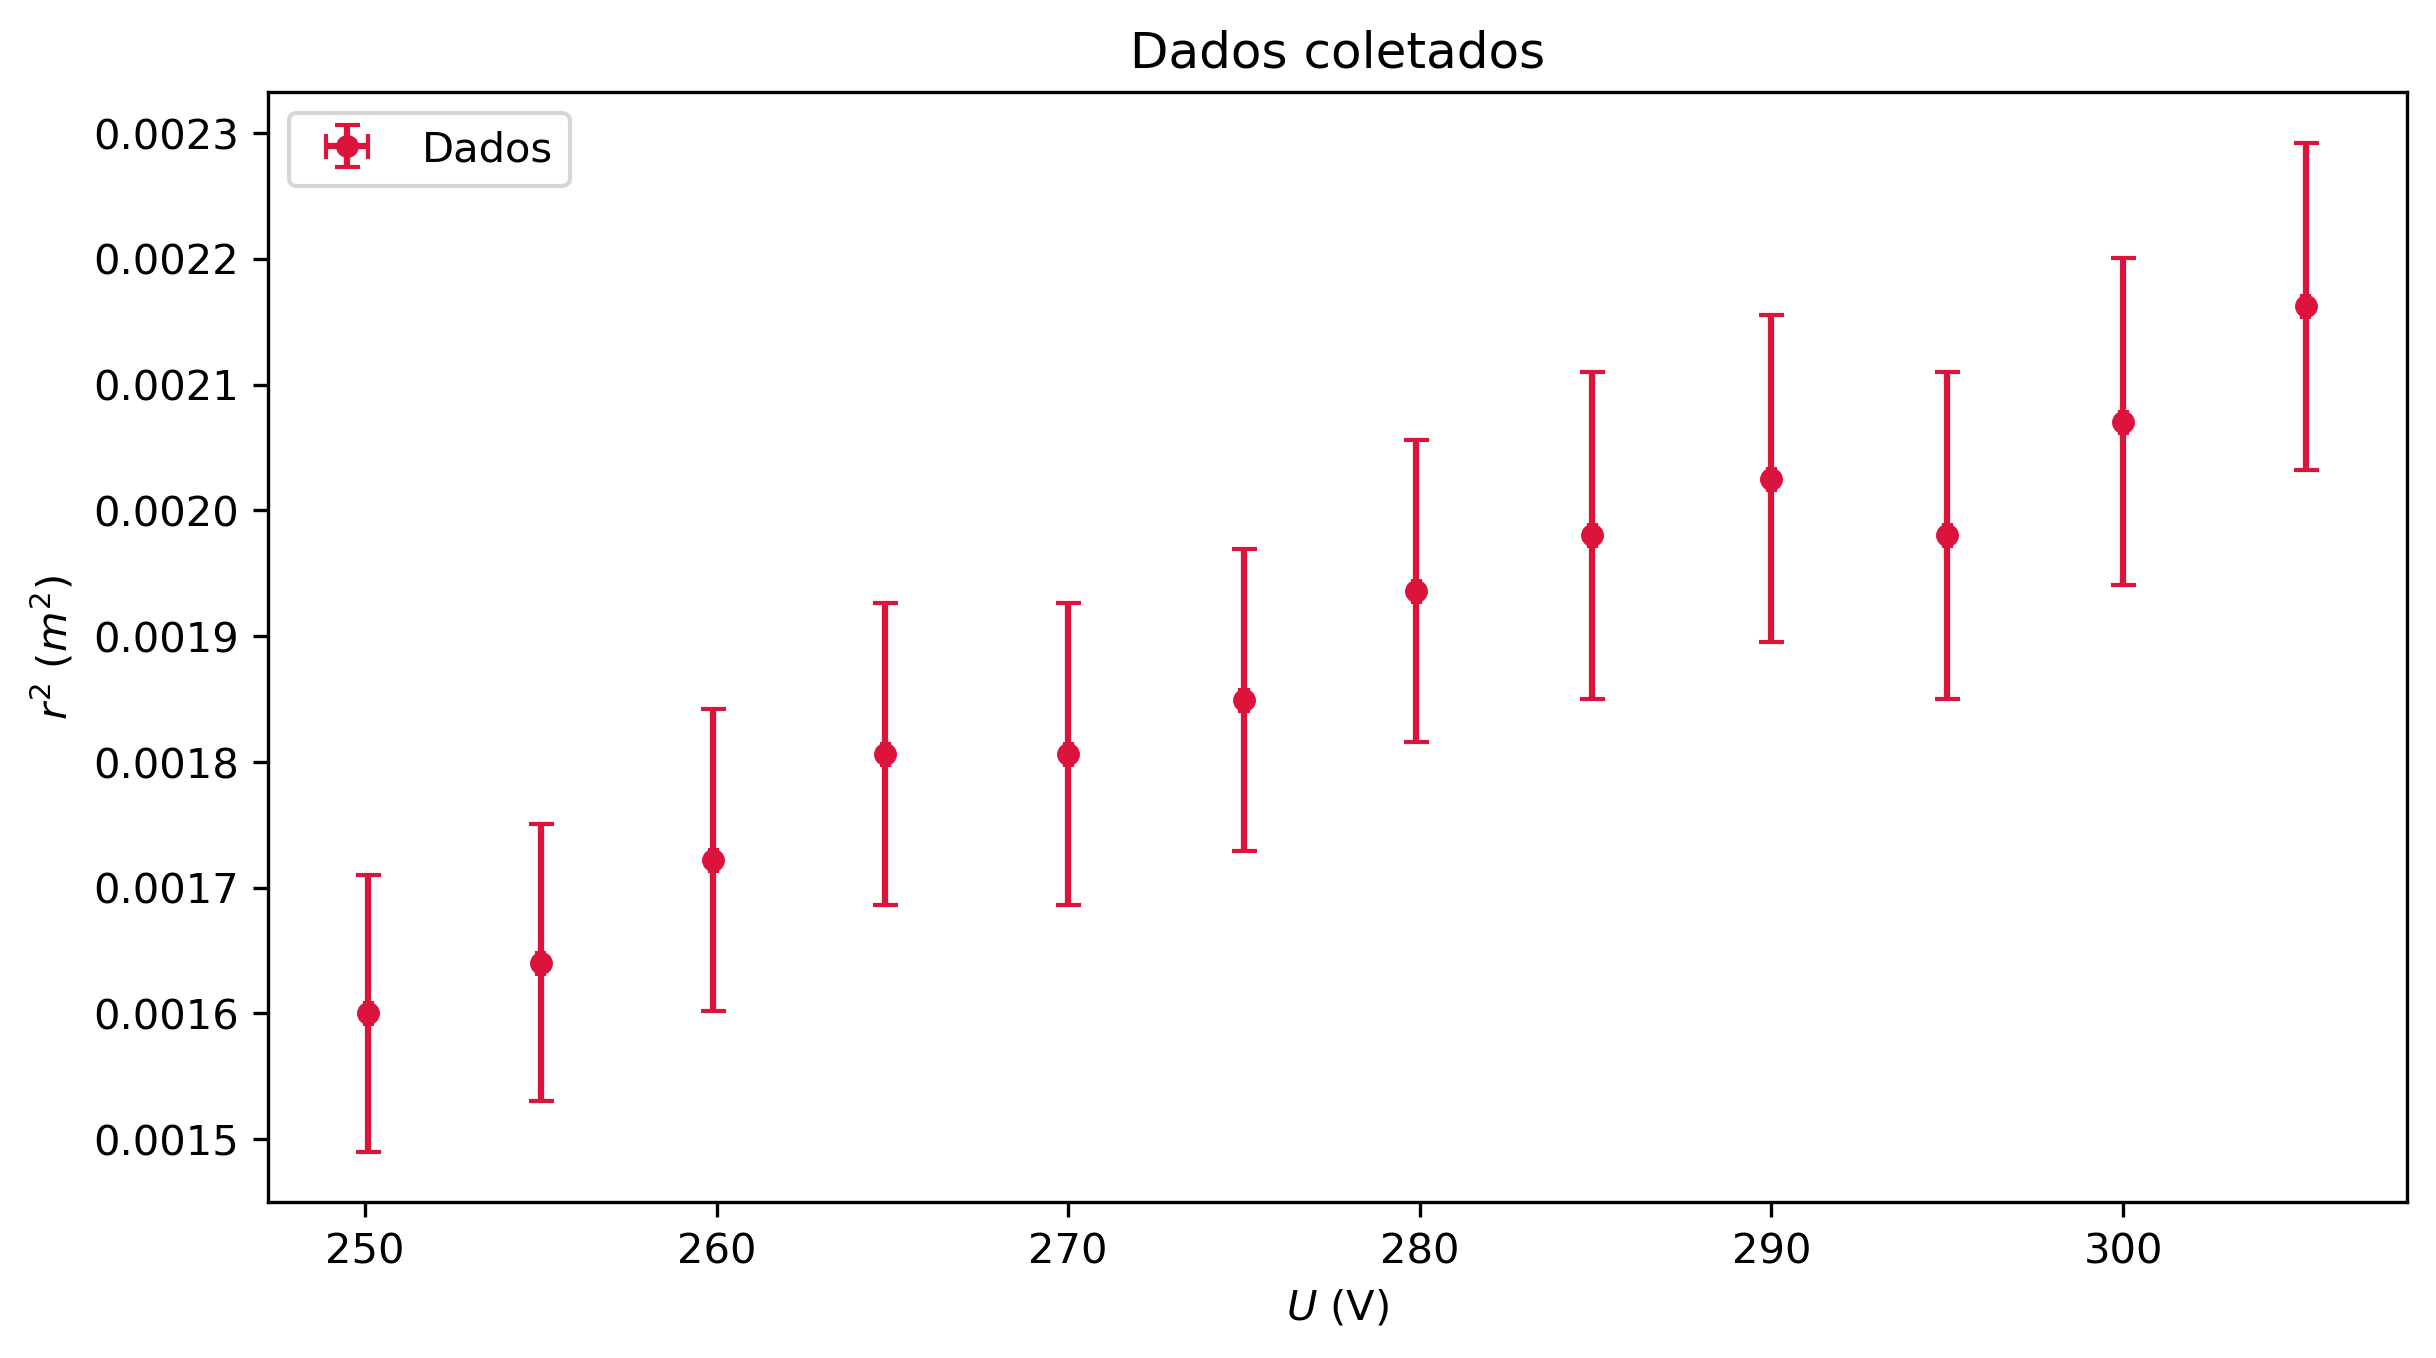

In [5]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(tensao,r_square,inc_r_square,inc_tensao, 'o', ms = 4.5, capsize=3, color = 'crimson', label = 'Dados')
plt.ylabel(r'$r^2$ ($m^2$)')
plt.xlabel(r'$U$ (V)')
plt.title('Dados coletados')
plt.legend()
plt.savefig('Graphs/ChargeMass/Dadosbrutos.pdf', dpi = 300)
plt.show()

# Ajuste linear

In [6]:
fitpars, cov_pars = np.polyfit(tensao,r_square,1,w=np.power(inc_r_square,-1),cov='True')
#print(fitpars, cov_pars)

coef_angular = fitpars[0]
coef_linear = fitpars[1]
sigma_angular = np.sqrt(cov_pars[0][0])
sigma_linear = np.sqrt(cov_pars[1][1])

sigma_angular = float('{:g}'.format(float('{:.2g}'.format(sigma_angular))))
sigma_linear = float('{:g}'.format(float('{:.2g}'.format(sigma_linear))))

                     
print('Coeficiente angular: %.7f +- %.7f (m^2/V)' % (coef_angular ,sigma_angular))
print('Coeficiente linear: %.5f +- %.5f (m^2)' %(coef_linear,sigma_linear))

Coeficiente angular: 0.0000096 +- 0.0000006 (m^2/V)
Coeficiente linear: -0.00077 +- 0.00015 (m^2)


## Gráfico contendo o ajuste

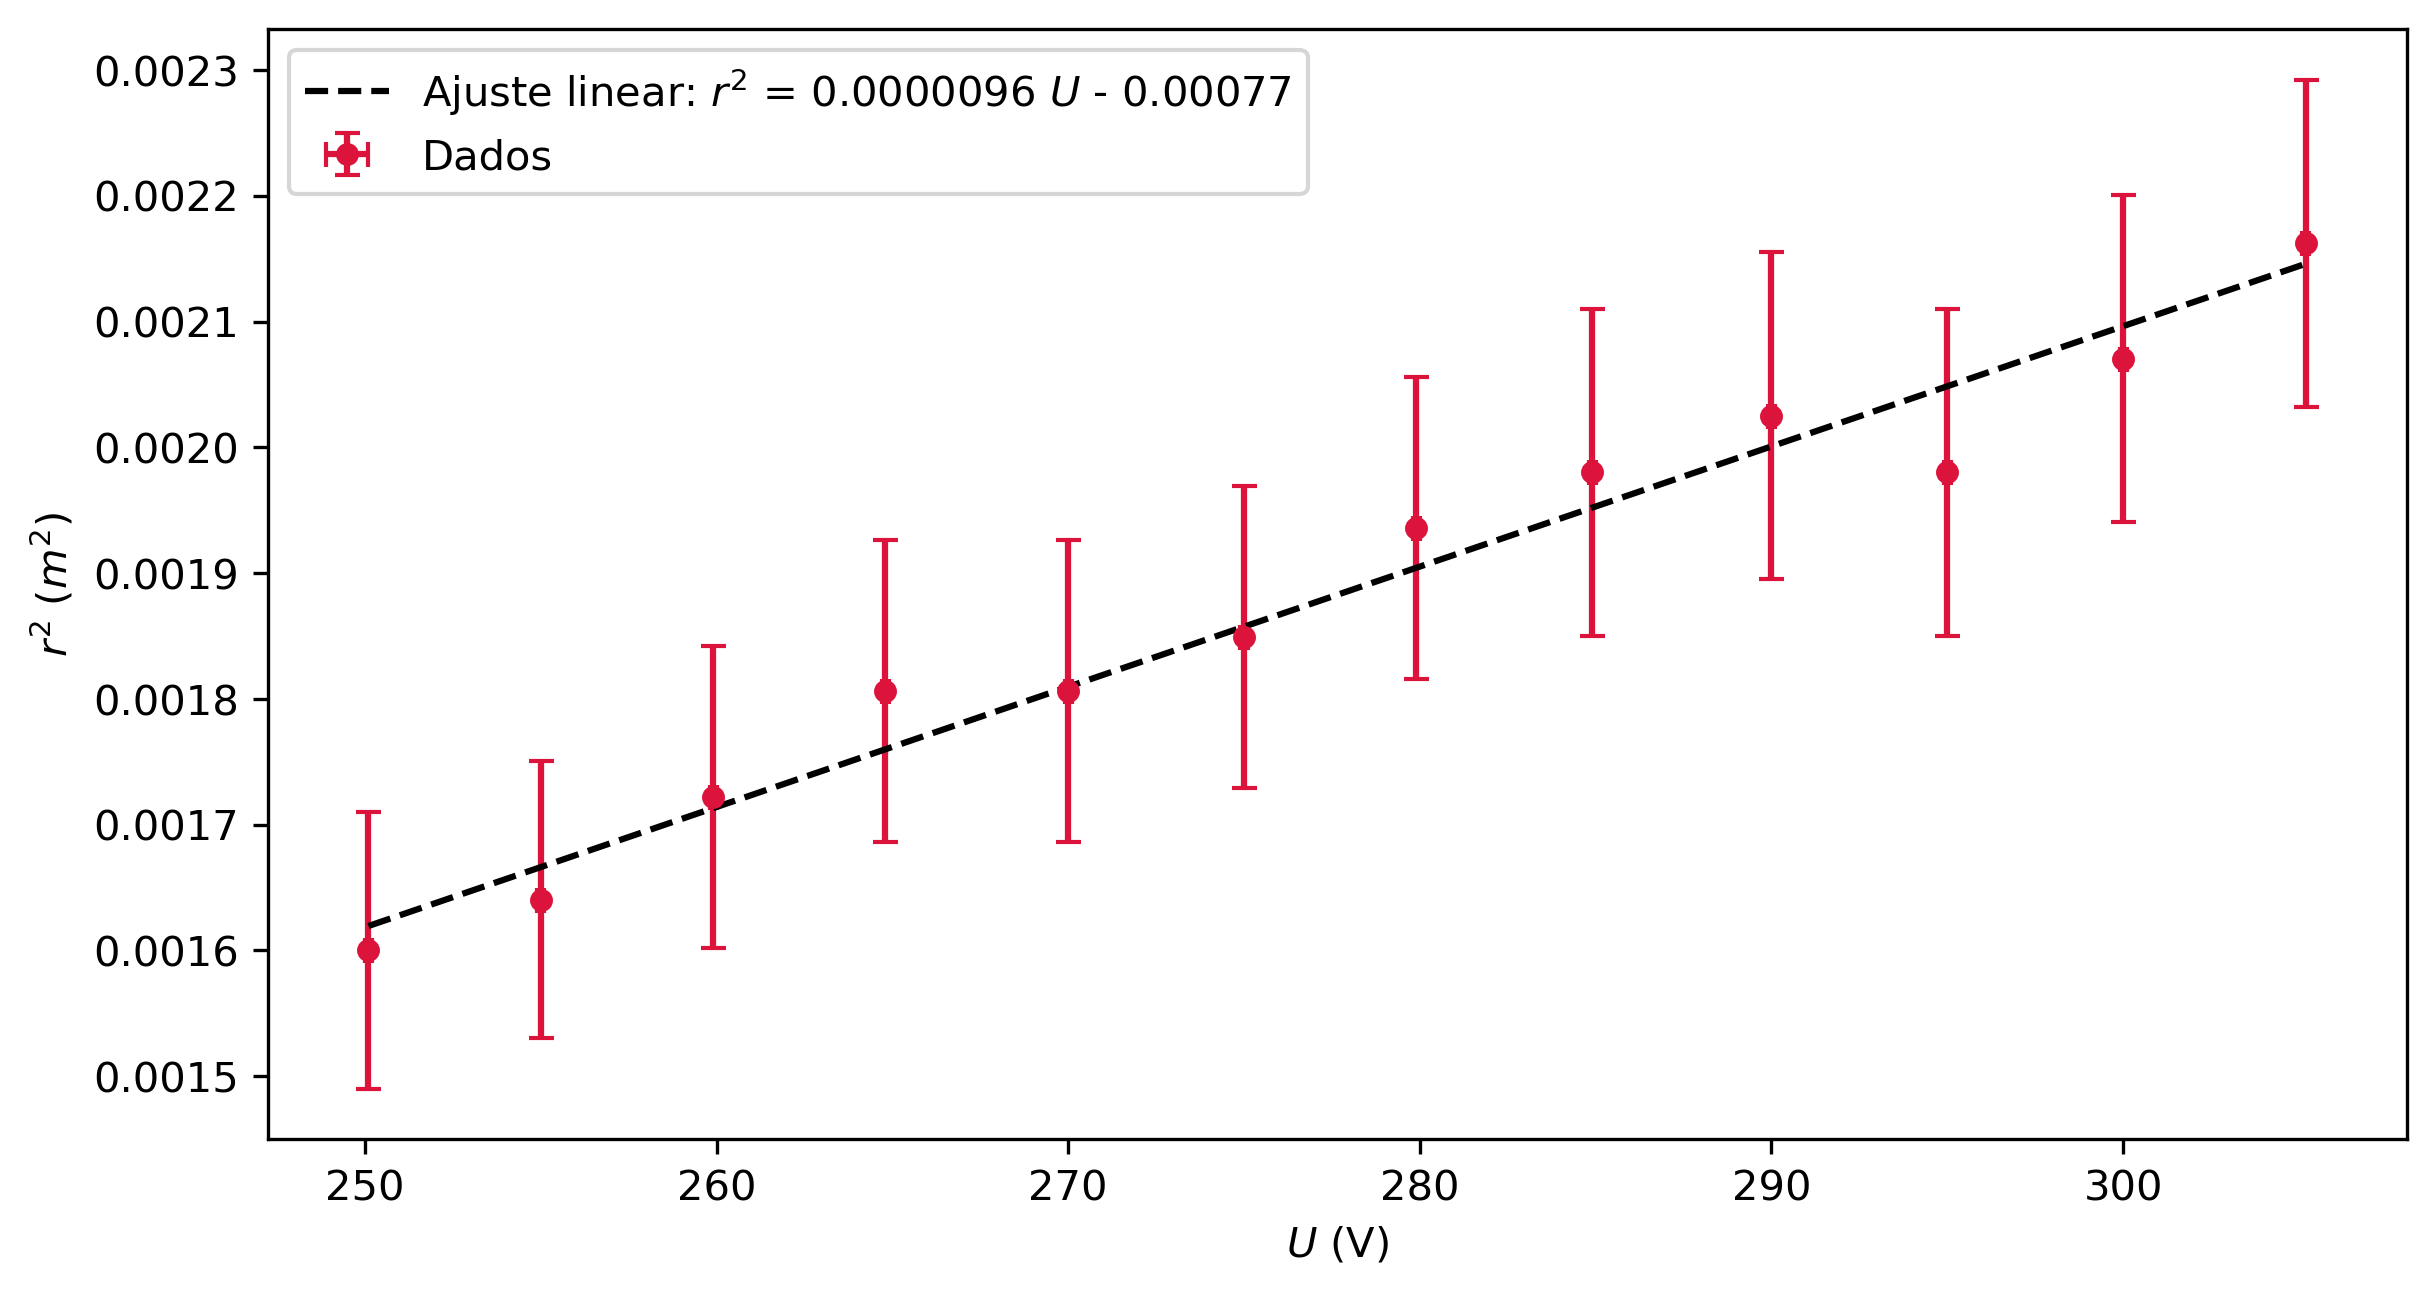

In [7]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(tensao,r_square,inc_r_square,inc_tensao, 'o', ms = 4.5, capsize=3, color = 'crimson', label = 'Dados')
plt.plot(tensao,tensao*coef_angular + coef_linear, color ='black', ls = '--', label = r'Ajuste linear: $r^2$ = %.7f $U$ - %.5f' % (coef_angular,abs(coef_linear)))
plt.ylabel(r'$r^2$ ($m^2$)')
plt.xlabel(r'$U$ (V)')
#plt.title('')
plt.legend()
plt.savefig('Graphs/ChargeMass/AjusteLinear.pdf', dpi = 300)
plt.show()

## Qualidade do ajuste

In [8]:
#Calulando chi^2_red
yhat = np.polyval(fitpars, tensao)
chi_squared = np.sum(((yhat - r_square)/inc_r_square) ** 2)
chi2_red = chi_squared/(len(tensao)-2)

#Imprimindo o resultado
print("chi^2_red = %.3f" % chi2_red)

chi^2_red = 0.073


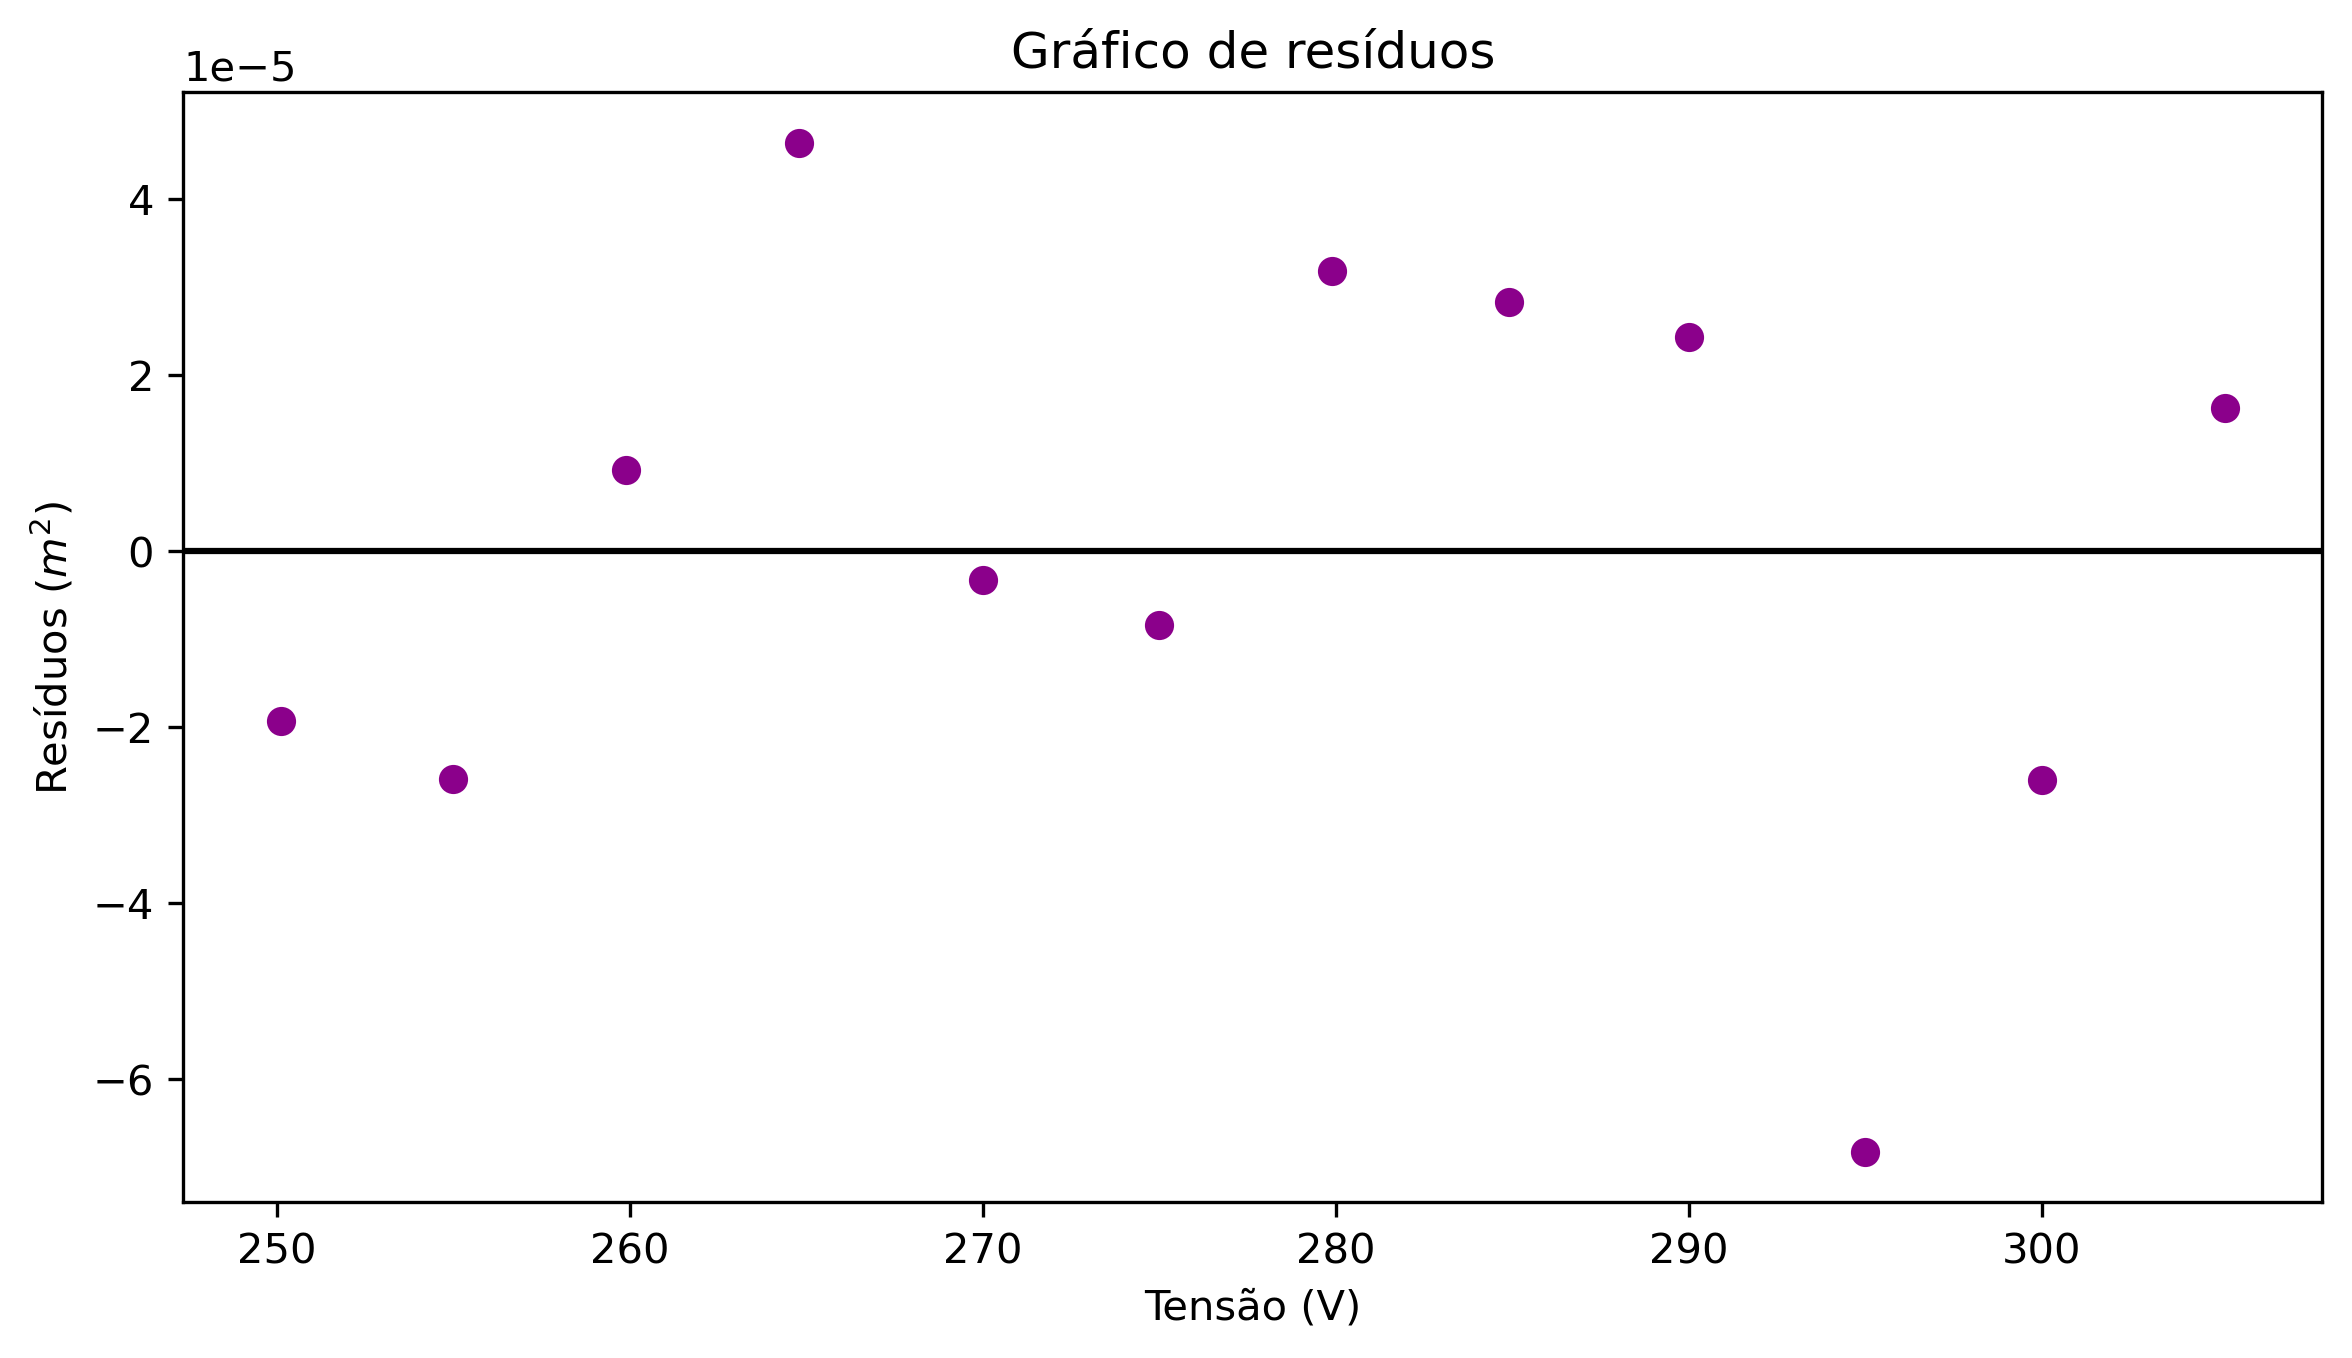

In [9]:
#Gráfico de resíduos
plt.figure(figsize = [9.2,4.9], dpi = 300) 
resid = (r_square - yhat)
plt.plot(tensao, resid, 'o', color = 'Darkmagenta')
plt.title("Gráfico de resíduos")
plt.xlabel("Tensão (V)")
plt.ylabel(r"Resíduos ($m^2$)")
plt.axhline(y=0, color='k', linestyle='-')
plt.savefig('Graphs/ChargeMass/Residuos.pdf', dpi = 300)
plt.show()

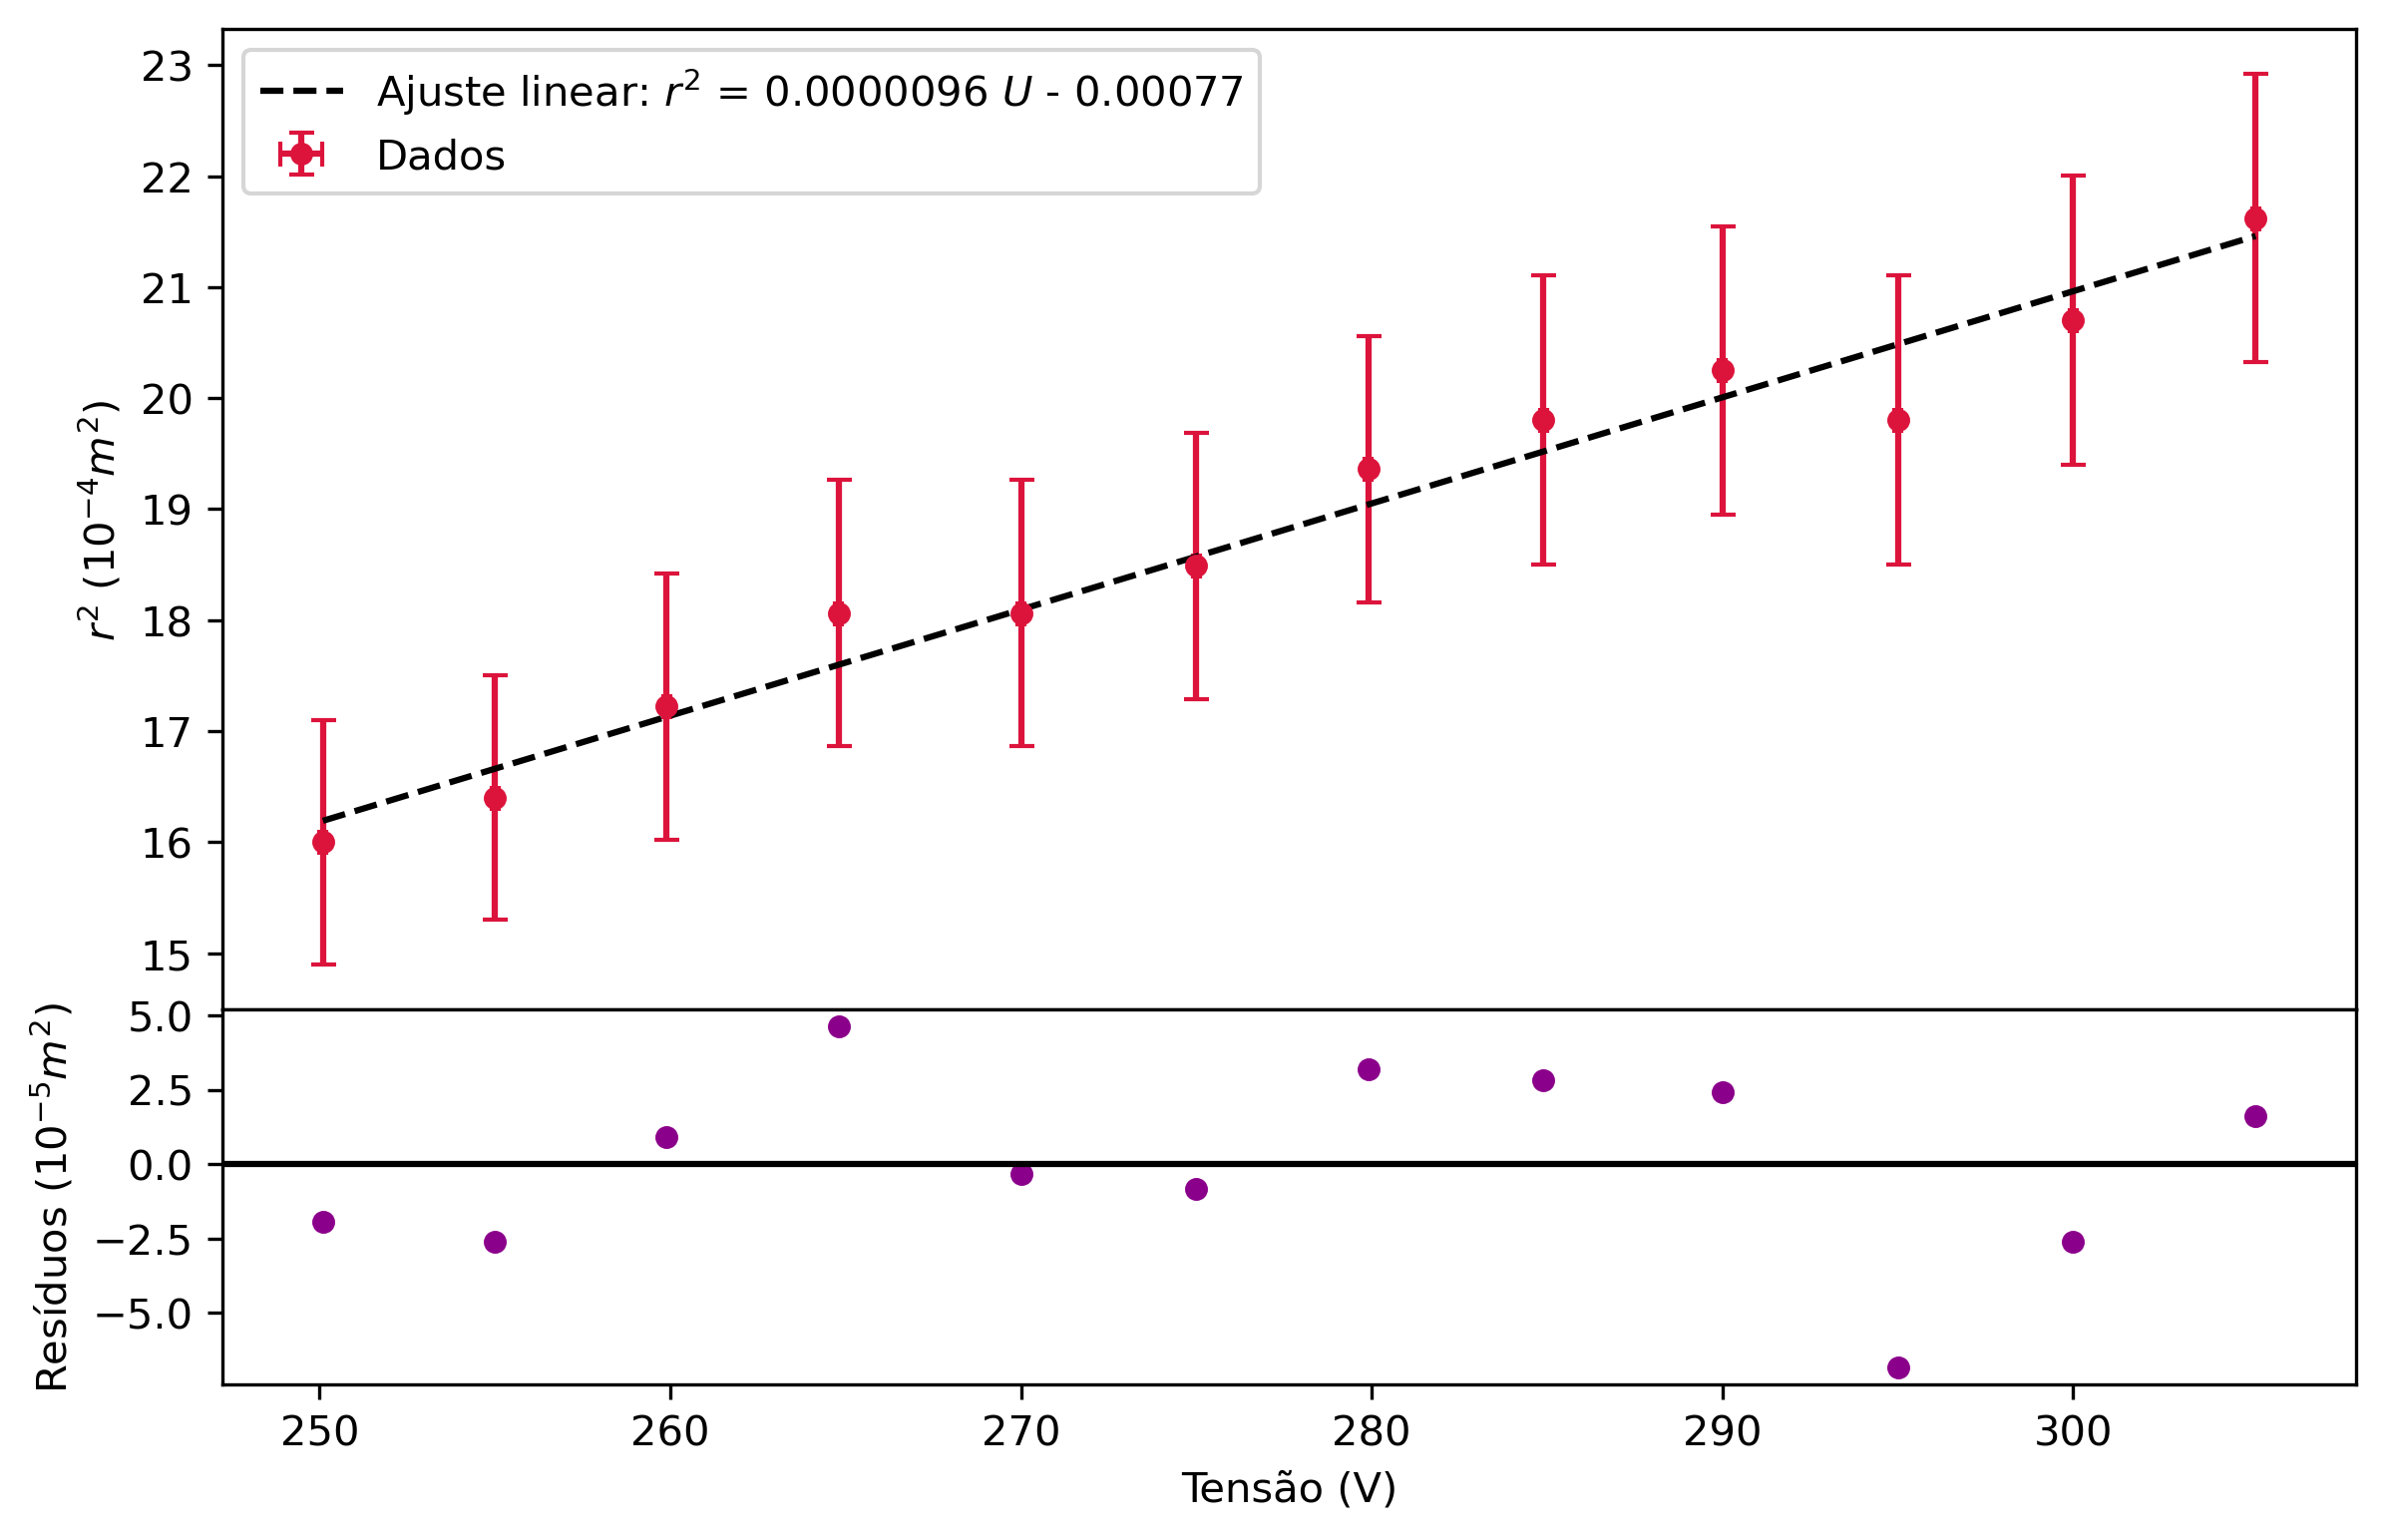

In [16]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(tensao,r_square*1e4,inc_r_square*1e4,inc_tensao, 'o', ms = 4.5, capsize=3, color = 'crimson', label = 'Dados')
axs[0].plot(tensao,(tensao*coef_angular + coef_linear)*1e4, color ='black', ls = '--',
         label = r'Ajuste linear: $r^2$ = %.7f $U$ - %.5f' % (coef_angular,abs(coef_linear)))
axs[0].set_ylabel(r'$r^2$ ($10^{-4}m^2$)')
axs[0].legend()

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (r_square - yhat)
axs[1].plot(tensao, resid*1e5, 'o',ms = 4.5,  color = 'Darkmagenta', label = 'Residuos')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($10^{-5}m^2$)")
axs[1].set_yticks(np.arange(-5,5.1,2.5))


plt.xlabel("Tensão (V)")
plt.savefig('Graphs/ChargeMass/Ajuste_Residuos.pdf', dpi = 300)

plt.show()

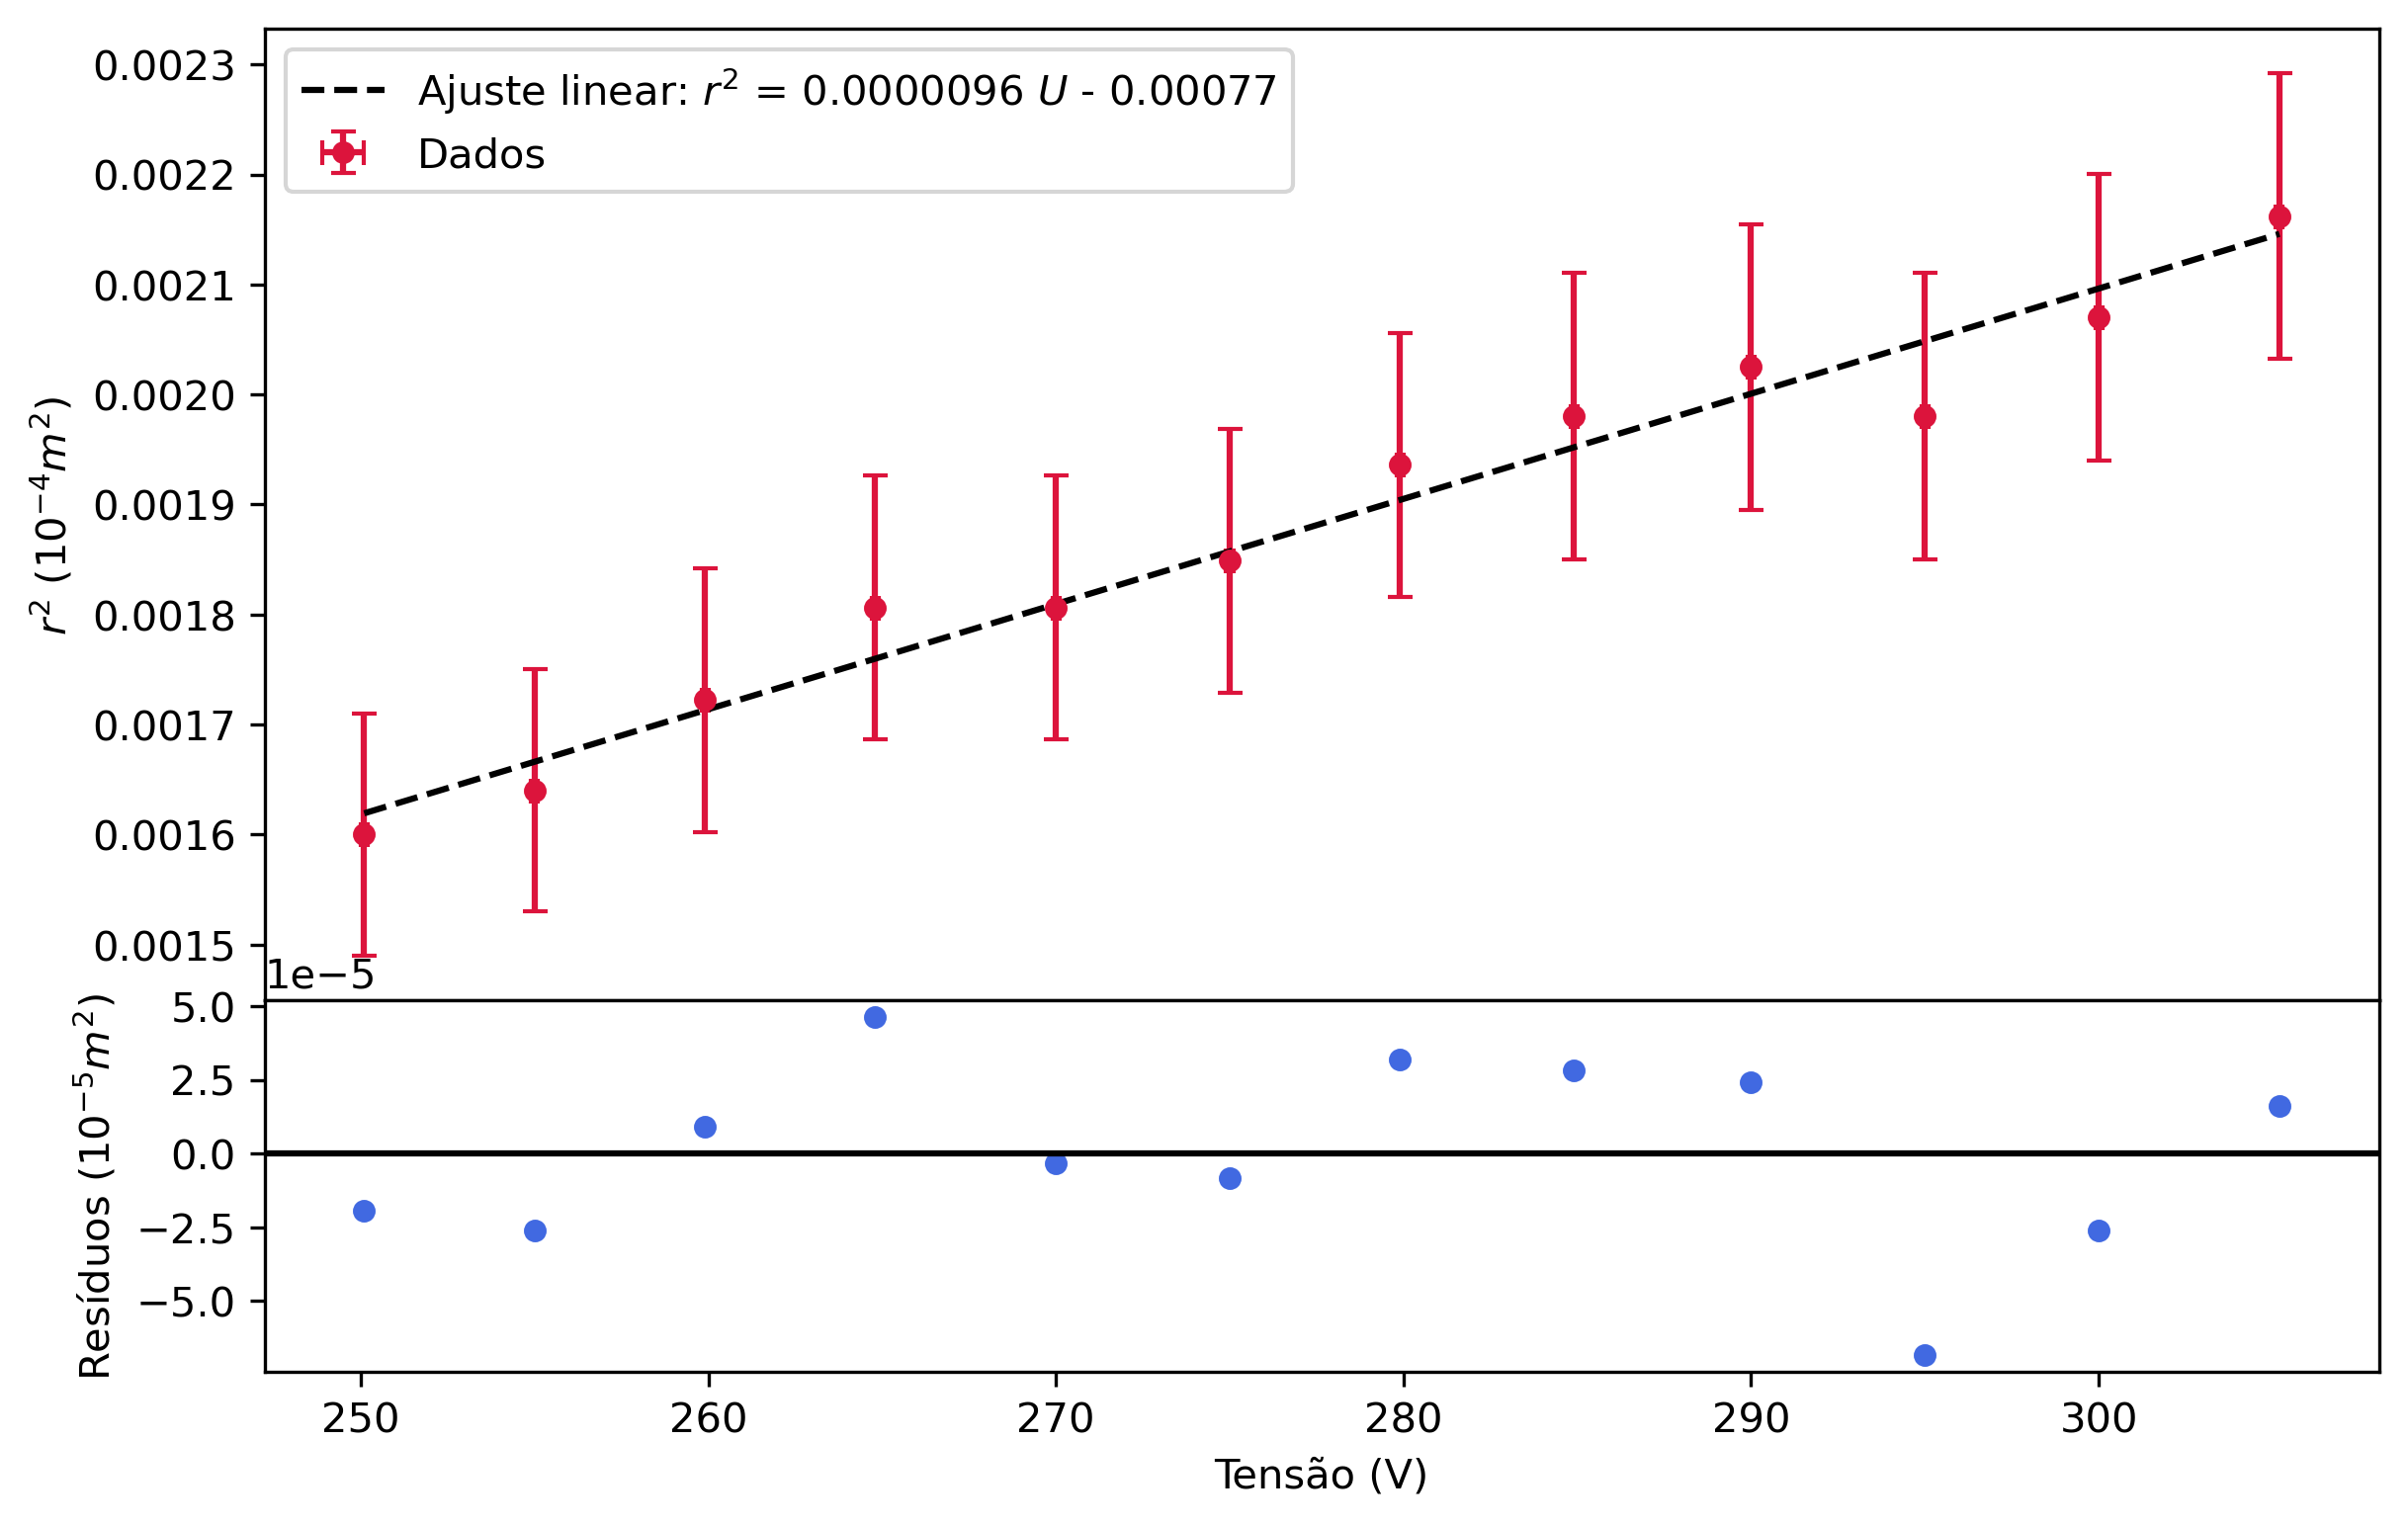

In [11]:
fig = plt.figure(figsize = [9.2,6], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[6, 2.3])
axs = gs.subplots(sharex=True)


#Gráfico principal
axs[0] = plt.subplot(gs[0])
axs[0].errorbar(tensao,r_square,inc_r_square,inc_tensao, 'o', ms = 4.5, capsize=3, color = 'crimson', label = 'Dados')
axs[0].plot(tensao,(tensao*coef_angular + coef_linear), color ='black', ls = '--',
         label = r'Ajuste linear: $r^2$ = %.7f $U$ - %.5f' % (coef_angular,abs(coef_linear)))
axs[0].set_ylabel(r'$r^2$ ($10^{-4}m^2$)')
axs[0].legend()

#Gráfico de resíduos
axs[1] = plt.subplot(gs[1])
resid = (r_square - yhat)
axs[1].plot(tensao, resid, 'o',ms = 4.5,  color = 'royalblue')
axs[1].axhline(y=0, color='k', linestyle='-')
axs[1].set_ylabel(r"Resíduos ($10^{-5}m^2$)")
axs[1].set_yticks(np.arange(-5,5.1,2.5)*1e-5)


plt.xlabel("Tensão (V)")
plt.show()

# Obtendo a razão carga massa através dos dados experimentais

Nós obtivemos o seguinte ajuste linear:

$$r^2 = c_aU + c_l$$

onde $c_a = (0.0000201 \pm 0.0000011) \ (m^2/V)$ e $c_l = (-0.00178 +- 0.00025) \ (m^2)$. Pelo modelo teórico, nós temos que $r^2 = \left(\frac{e}{m}\right)^{-1}\frac{2 (5/4)^3 a^2}{(N \mu_0 I)^2 } \ U$. Deste modo, ao compararmos a teoria com o ajuste, vemos que:

$$c_a  = \left(\frac{e}{m}\right)^{-1}\frac{2 (5/4)^3 a^2}{(N \mu_0 I)^2 }$$
$$\implies \frac{e}{m} = \frac{2 (5/4)^3 a^2}{c_a(N \mu_0 I)^2}$$

Para obtermos a incerteza da relação carga massa, devemos propagar o erro do coeficiente angular e da corrente aplicada na bobina da seguinte forma:

$$\sigma_{\frac{e}{m}} = \sqrt{\left(\frac{\partial \frac{e}{m}}{\partial c_a}\right)^2\sigma_{c_a}^2 + \left(\frac{\partial \frac{e}{m}}{\partial I}\right)^2\sigma_{I}^2}$$

Utilizando a expressão da carga massa:

$$\sigma_{\frac{e}{m}} = \sqrt{\left(\frac{\partial }{\partial c_a} \frac{2 (5/4)^3 a^2}{c_a(N \mu_0 I)^2}\right)^2\sigma_{c_a}^2 + \left(\frac{\partial }{\partial I} \frac{2 (5/4)^3 a^2}{c_a(N \mu_0 I)^2}\right)^2\sigma_{I}^2}$$

$$\sigma_{\frac{e}{m}} = \sqrt{\left(- \frac{2 (5/4)^3 a^2}{(c_a N \mu_0 I)^2}\right)^2\sigma_{c_a}^2 + \left(- \frac{4 (5/4)^3 a^2}{c_a(N \mu_0 )^2 I^3}\right)^2\sigma_{I}^2}$$

$$\sigma_{\frac{e}{m}} = \frac{2 (5/4)^3 a^2}{c_a( N \mu_0 I)^2}\sqrt{\left(\frac{\sigma_{c_a}}{c_a}\right)^2 + \left(\frac{2\sigma_I}{I}\right)^2}$$

$$\sigma_{\frac{e}{m}} = \frac{e}{m}\sqrt{\left(\frac{\sigma_{c_a}}{c_a}\right)^2 + \left(\frac{2\sigma_I}{I}\right)^2}$$



In [12]:
#Grandezas necesárias:
a = 0.15 # raio da bobina em metros
n = 130 # numero de voltas da bobina
i = 1.366 # Corrente na bobina em ampére
inc_i = 0.001 #A
mu0 = 4*np.pi*1e-7

#Calculando a razão carga massa
e_m_ratio = (2 * (5/4)**3 * a**2)/(coef_angular * (n * mu0 * i)**2)

#Calculando a incerteza da razão cara massa
inc_e_m_ratio = e_m_ratio * np.sqrt((sigma_angular/coef_angular)**2 + ((2*inc_i)/i)**2)
inc_e_m_ratio = float('{:g}'.format(float('{:.2g}'.format(inc_e_m_ratio))))

print('e/m = (%.2f +- %.2f) 10^{11}C/kg' % (e_m_ratio/1e11,inc_e_m_ratio/1e11))


e/m = (1.85 +- 0.11) 10^{11}C/kg


In [13]:
e_m_ratio_real = 1.75882001076e11

print('desvio:', abs(1 - e_m_ratio/e_m_ratio_real))

desvio: 0.0499068400647642


# Seção curiosidade

Calculando diretamente a razão carga massa:

$$\frac{e}{m} = \frac{2 U(5/4)^3 a^2}{(N \mu_0 I r)^2 }$$

Podemos obter a incerteza associada a este valor propagando o erro de $r$, $U$ e $I$:

$$\sigma_{\frac{e}{m}} = \sqrt{\left(\frac{\partial \frac{e}{m}}{\partial r}\right)^2\sigma_{r}^2 + \left(\frac{\partial \frac{e}{m}}{\partial U}\right)^2\sigma_{U}^2 +\left(\frac{\partial \frac{e}{m}}{\partial I}\right)^2\sigma_{I}^2}$$

Utilizando a expressão da carga massa:

$$\sigma_{\frac{e}{m}} = \sqrt{\left(-\frac{4 U(5/4)^3 a^2}{r^3 (N \mu_0 I )^2}\right)^2\sigma_{r}^2 + \left(\frac{2 (5/4)^3 a^2}{(N \mu_0 I r)^2}\right)^2\sigma_{U}^2 +\left( -\frac{4 U(5/4)^3 a^2}{I^3(N \mu_0  r)^2}\right)^2\sigma_{I}^2}$$

$$\sigma_{\frac{e}{m}} = \frac{2 U(5/4)^3 a^2}{(N \mu_0 I r)^2 }\sqrt{\left(\frac{2\sigma_r}{r}\right)^2 + \left(\frac{\sigma_U}{U}\right)^2 +\left( \frac{2\sigma_I}{I}\right)^2}$$

$$\sigma_{\frac{e}{m}} = \frac{e}{m}\sqrt{\left(\frac{2\sigma_r}{r}\right)^2 + \left(\frac{\sigma_U}{U}\right)^2 +\left( \frac{2\sigma_I}{I}\right)^2}$$

In [14]:
i_b = np.full(len(tensao),i)
inc_i_b = np.full(len(tensao),inc_i)

cm_ratio = (2 * (5/4)**3 * a**2 * tensao)/((n * mu0 * i * r)**2)

inc_cm_ratio = cm_ratio * np.sqrt(((2*inc_r)/r)**2 + (inc_tensao/tensao)**2 + ((2*inc_i_b/i)**2))
inc_cm_ratio = [float('{:g}'.format(float('{:.2g}'.format(sigma)))) for sigma in inc_cm_ratio]


print(cm_ratio, inc_cm_ratio)

[2.75885217e+11 2.74387837e+11 2.66345159e+11 2.58746713e+11
 2.63827842e+11 2.62500723e+11 2.55171559e+11 2.53925987e+11
 2.52759619e+11 2.62927926e+11 2.55760330e+11 2.49122725e+11] [20000000000.0, 19000000000.0, 18000000000.0, 17000000000.0, 18000000000.0, 17000000000.0, 16000000000.0, 16000000000.0, 16000000000.0, 17000000000.0, 16000000000.0, 15000000000.0]


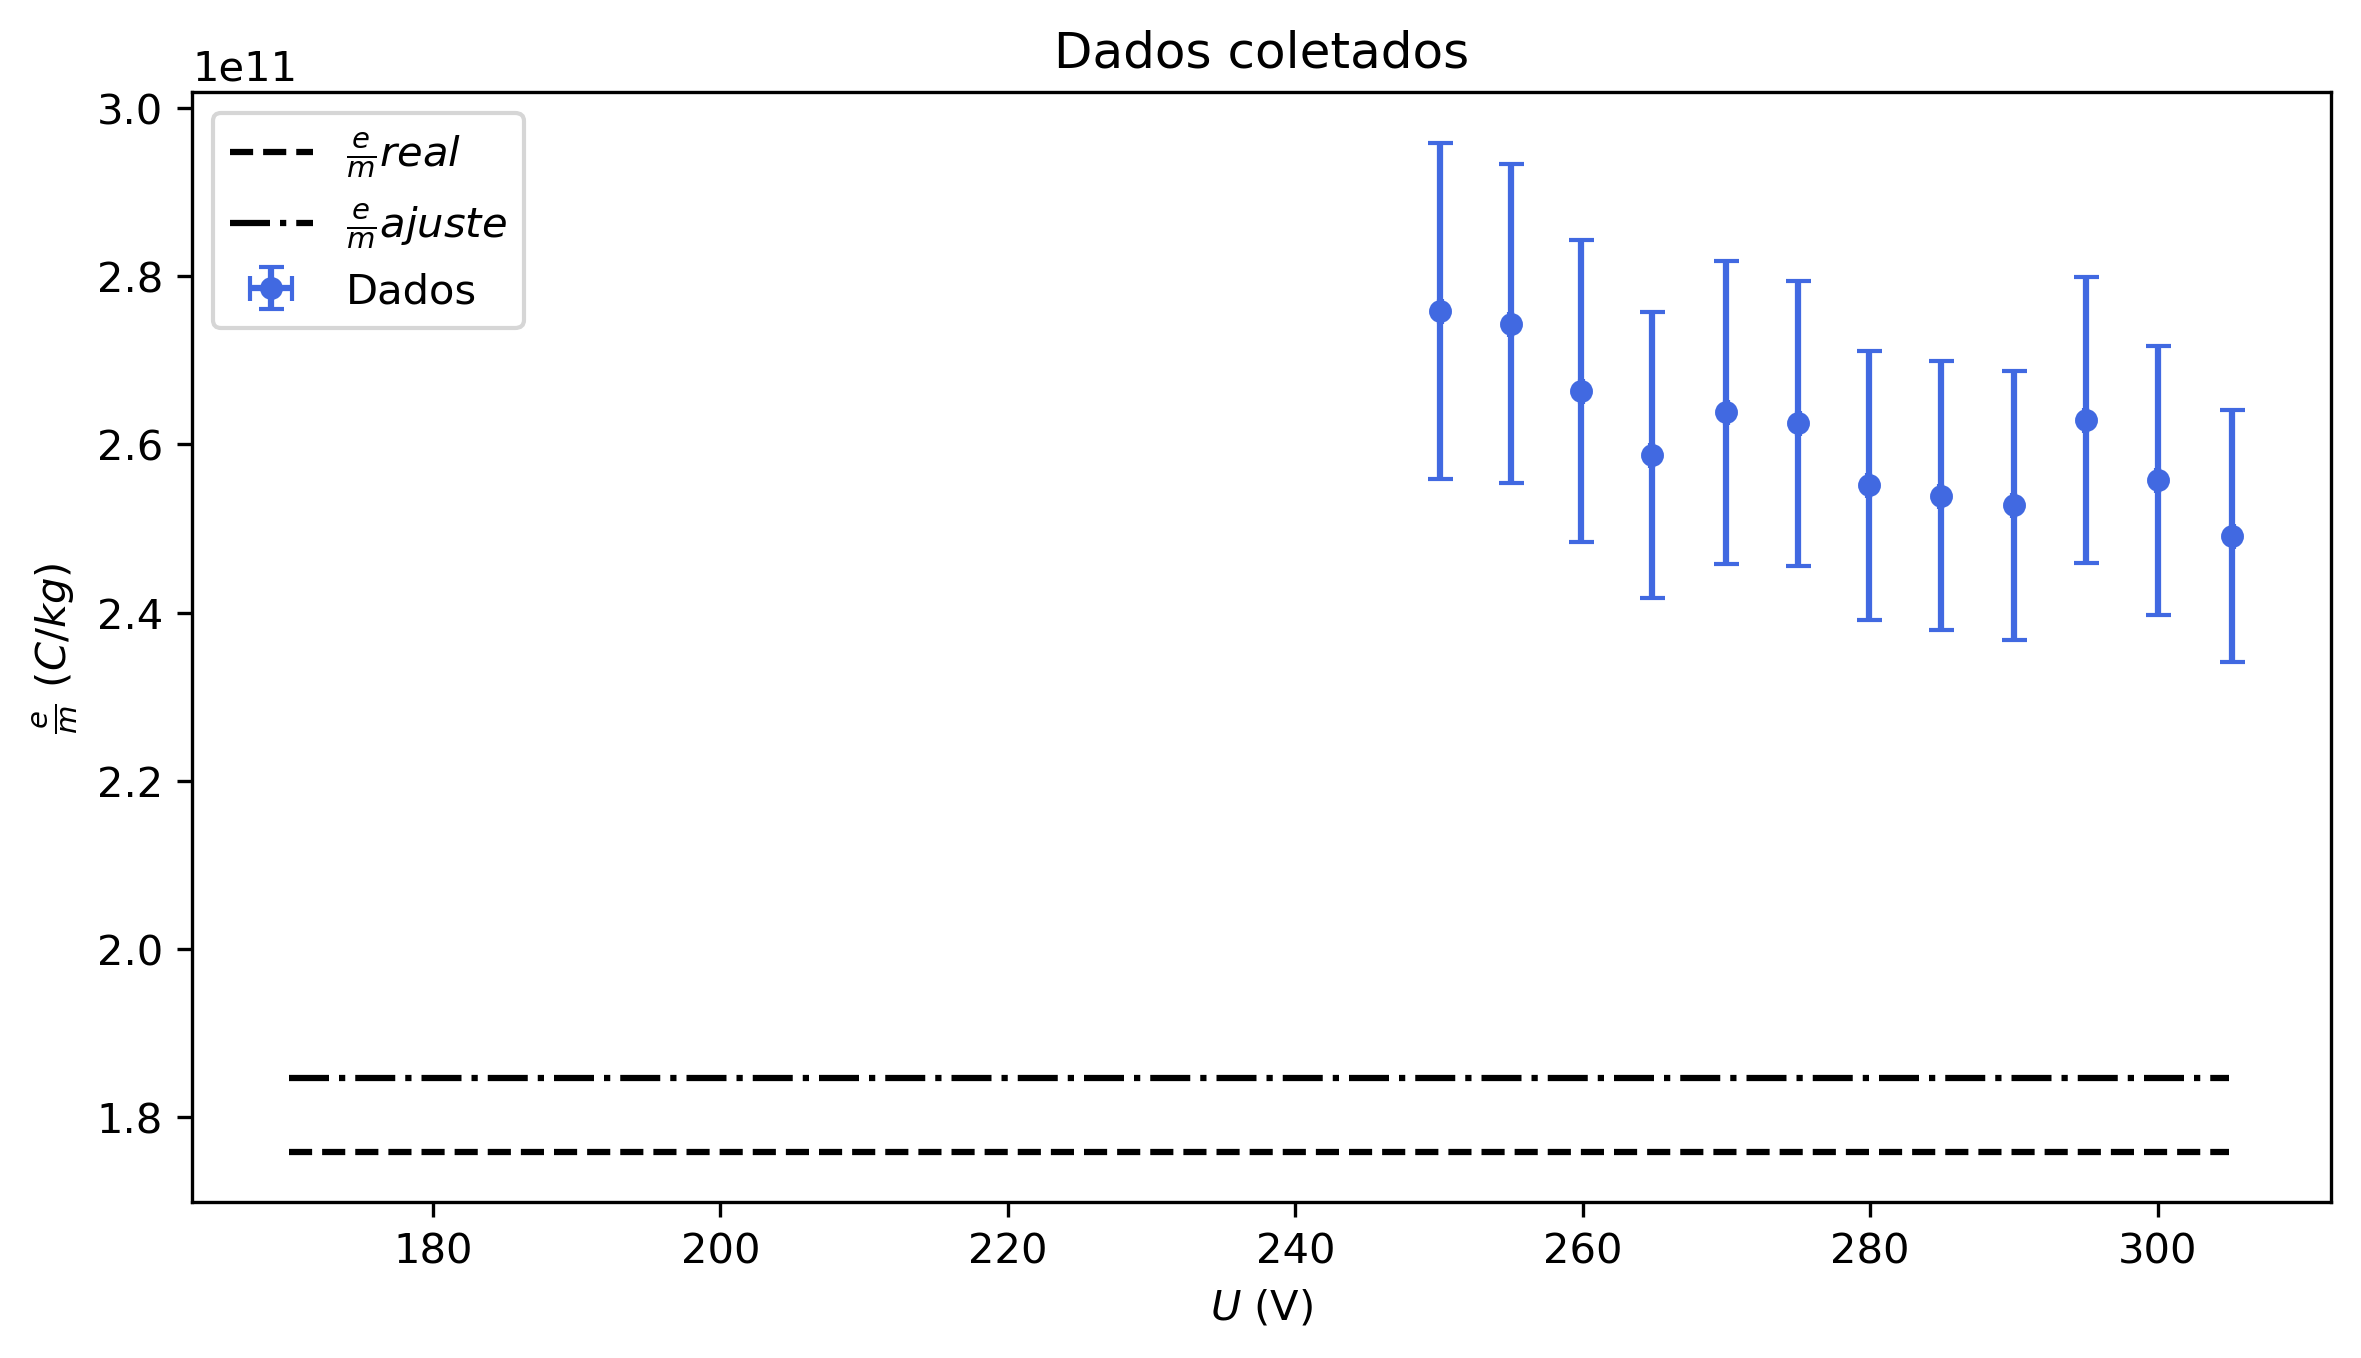

In [15]:
plt.figure(figsize = [9.2,4.9], dpi = 300) 
plt.errorbar(tensao,cm_ratio,inc_cm_ratio,inc_tensao, 'o', ms = 4.5, capsize=3, color = 'royalblue', label = 'Dados')
plt.plot([170,305],[e_m_ratio_real,e_m_ratio_real], ls = '--', color = 'black', label = r'$\frac{e}{m} real$')
plt.plot([170,305],[e_m_ratio,e_m_ratio], ls = '-.', color = 'black', label = r'$\frac{e}{m} ajuste$')
plt.ylabel(r'$\frac{e}{m}$ ($C/kg$)')
plt.xlabel(r'$U$ (V)')
plt.title('Dados coletados')
plt.legend()
#plt.savefig('Graphs/ChargeMass/Dadosbrutos.pdf')
plt.show()